<a href="https://colab.research.google.com/github/mmassonn/breast_cancer_prediction/blob/main/breast_cancer_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet : Analyse des données


##I. Importer les bibliothèques/framework

In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##II. EDA(Exploration et analyse des données)

In [ ]:
#load data
df = pd.read_csv('drive/MyDrive/Projet_2022/breast_cancer_prediction/dataset.csv')

###A.Analyse de la forme

In [ ]:
#explore first fives rows ==> df values
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###Les caractériqtiques sont les suivantes :

Attribute Information:

1) ID number : numéro d'identification

2) Diagnosis (M = malignant, B = benign) : diagnostique du patient (M = Malin et B = Benin)

De la colonne 3 à 32 : Dix caractéristiques sont calculées pour chaque noyau cellulaire :

a) radius (mean of distances from center to points on the perimeter) : rayon ((moyenne des distances du centre aux bords du noyau)

b) texture (standard deviation of gray-scale values) : 
texture (écart type des valeurs de niveaux de gris)

c) perimeter : périmètre

d) area : aire

e) smoothness (local variation in radius lengths) : finesse(variation locale des longueurs de rayon)

f) compactness (perimeter^2 / area - 1.0) : épaisseur (périmètre ^ 2 / surface - 1,0)

g) concavity (severity of concave portions of the contour) : 
concavité (sévérité des parties concaves du contour)

h) concave points (number of concave portions of the contour) : points concaves (nombre de parties concaves du contour)

i) symmetry : symétrie

j) fractal dimension ("coastline approximation" - 1) : dimension fractale ("approximation du littoral" - 1)


La moyenne, l'erreur type et la "pire" ou la plus grande (moyenne des trois plus grandes valeurs) de ces caractéristiques ont été calculées pour chaque image, résultant en 30 caractéristique. 

Par exemple, le champ 3 est le rayon moyen, le champ 13 est le rayon SE, le champ 23 est le pire rayon.

target identification : target

In [ ]:
#shape
df.shape 

(569, 33)

Nombre de lignes = 569 patients

Nombre de colonnes = 32 caractéristiques + 1 cible

Cible = Diagnostic



In [ ]:
#variable types
df.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

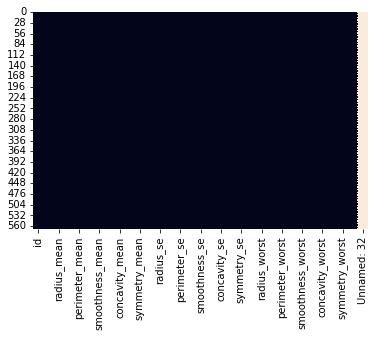

In [ ]:
#Nan values   
sns.heatmap(df.isna(), cbar=False)

**Observation :** Il n'y a pas de valeur manquante sauf la colonne ['Unamed: 32'] que l'on doit supprimer.

Attention : La colonne ['id'] n'a pas d'utiliter donc doit être supprimée.

In [ ]:
#remove id and Unamed columns
df = df.drop(['id','Unnamed: 32'], axis=1) 

###B.Analyse des données

###1.Analyse de la distribution des variables

###a.variable cible

In [ ]:
#target vizualisation
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

**Concernant la cible :** 

Il y a 63% de patients ayant développé un cancer du sein benin et 37% de patients ayant développé un cancer malin. 

La base de donnée n'est pas équilibrée. Une attention particulière devra être portée à cette caractéristique du jeu de données.

###b.variables quantitatives

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

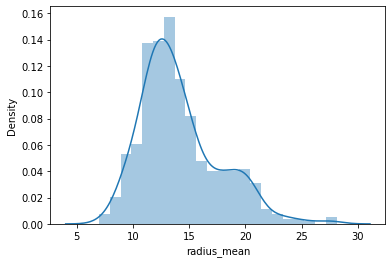

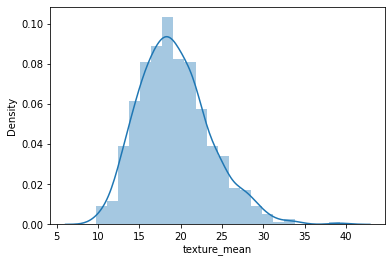

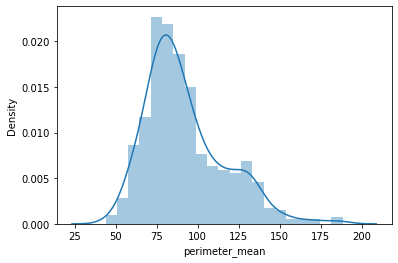

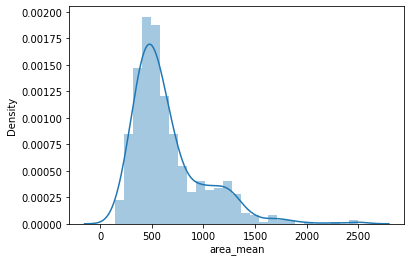

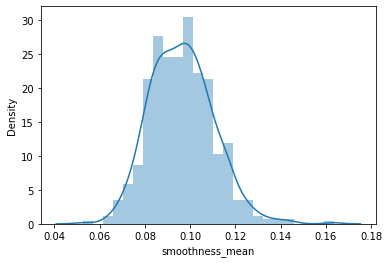

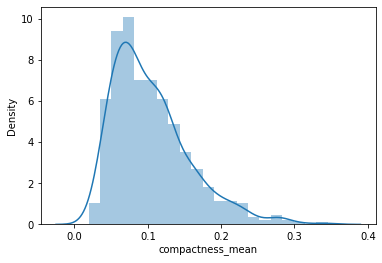

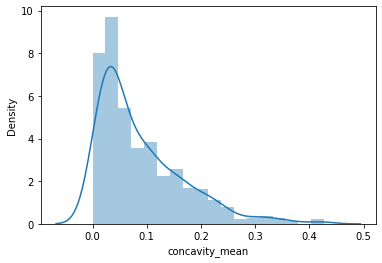

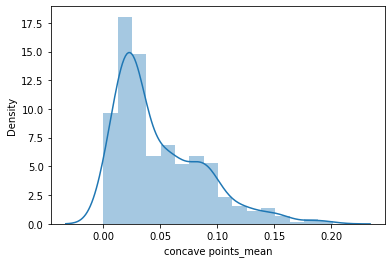

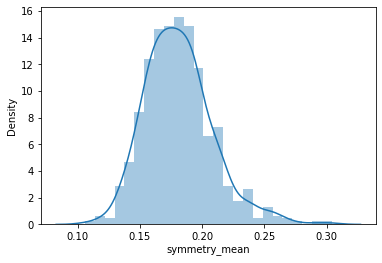

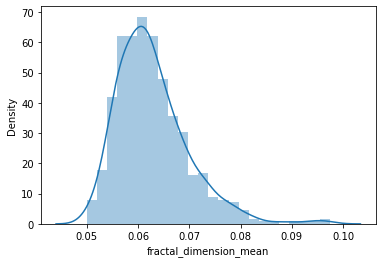

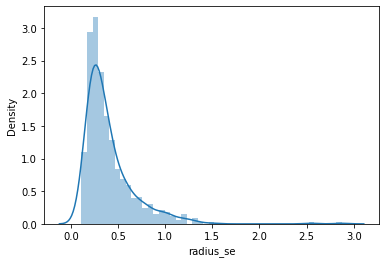

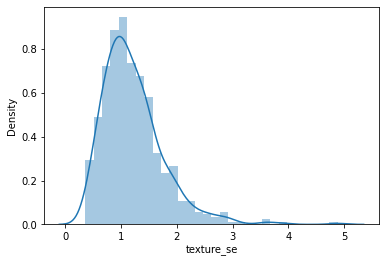

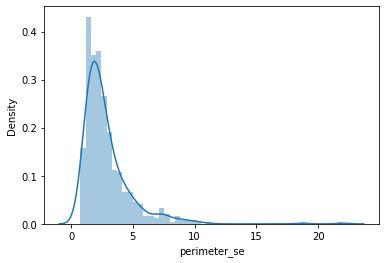

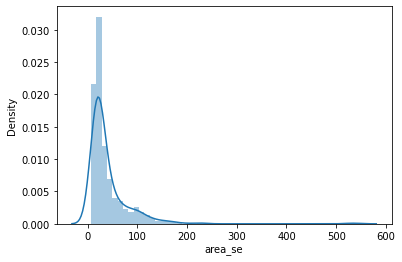

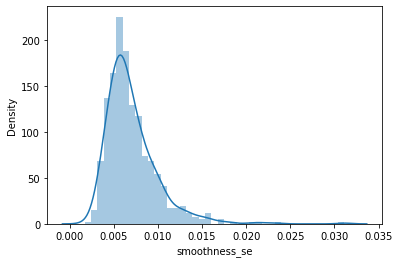

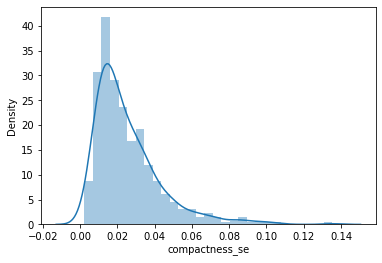

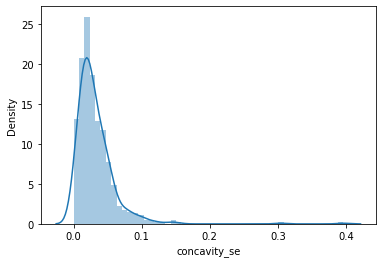

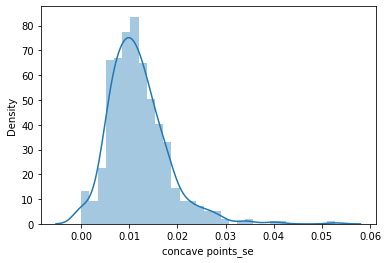

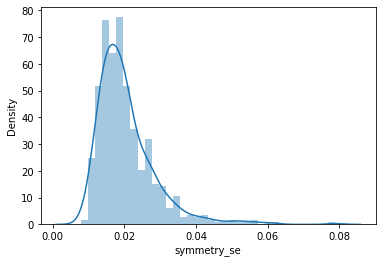

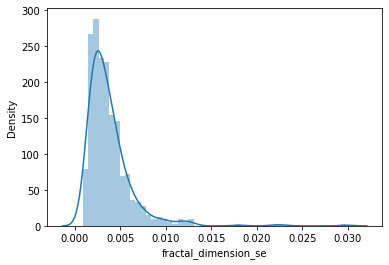

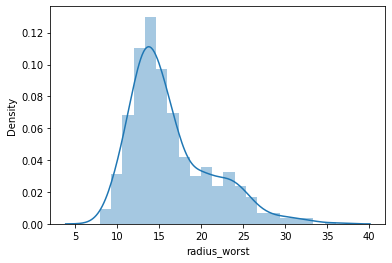

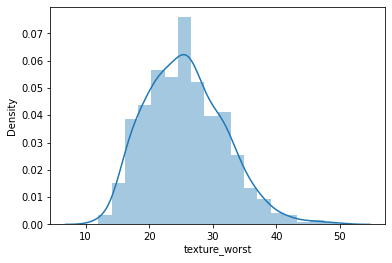

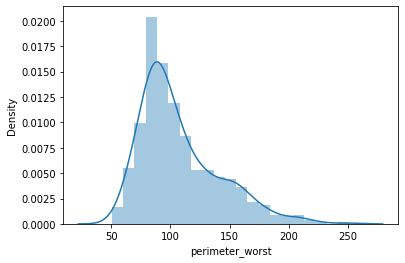

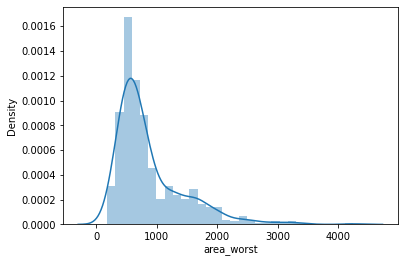

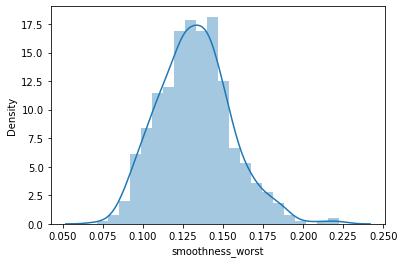

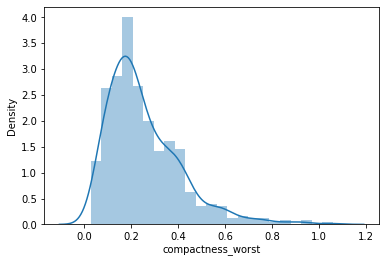

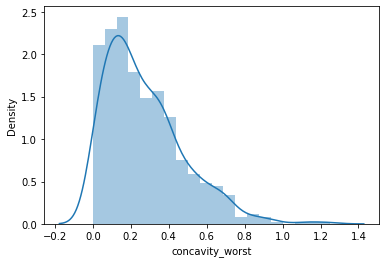

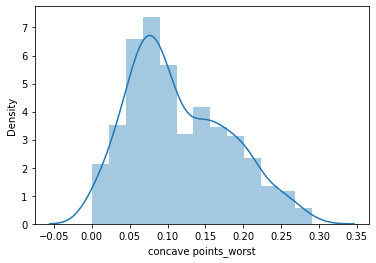

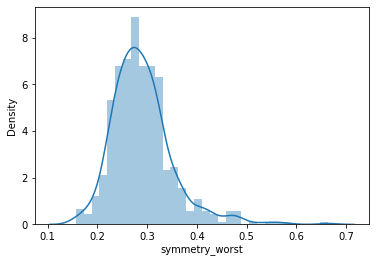

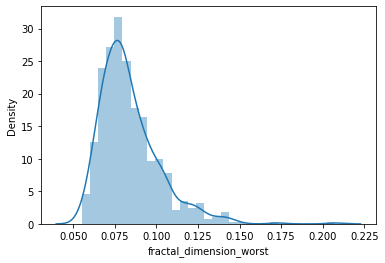

In [ ]:
#continue variables histograms
for col in df.drop('diagnosis',axis=1):
    plt.figure()
    sns.distplot(df[col])

**Concernant les variables quantitatives :**

L'ensemble des variables quantitatives semble suivre une loi normale.

###2.Analyse de la relation entre les variables

###a.cible/variables

In [ ]:
#created positive and negative under set
malin_df = df[df['diagnosis'] == 'M']   
benin_df = df[df['diagnosis'] == 'B']   

In [ ]:
#created positive and negative under set
features_df = df.drop('diagnosis', axis=1) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

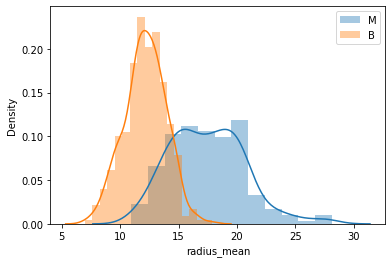

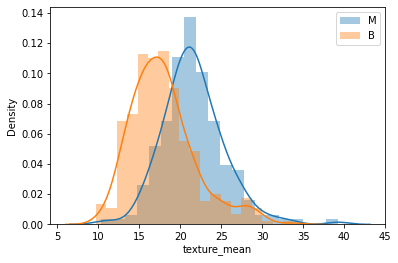

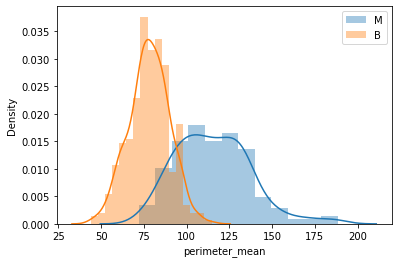

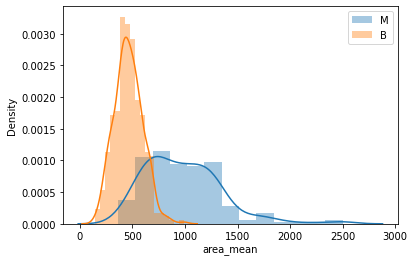

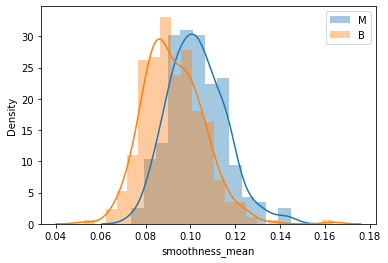

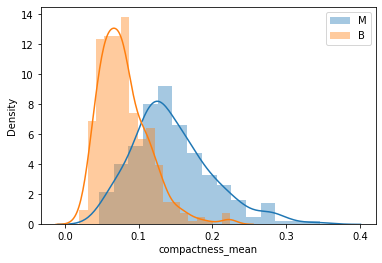

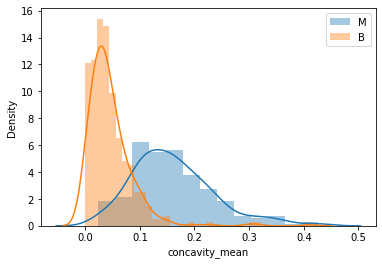

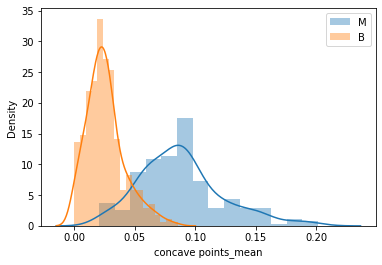

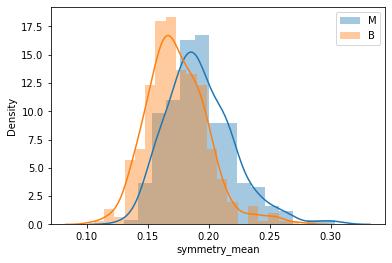

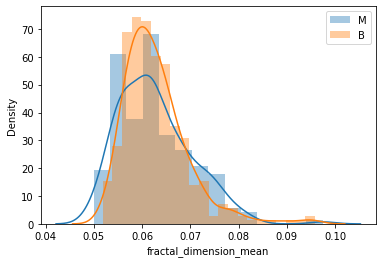

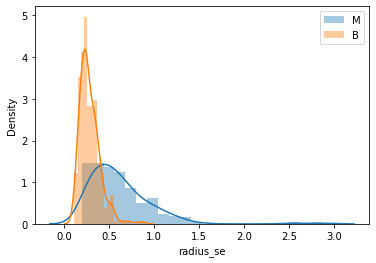

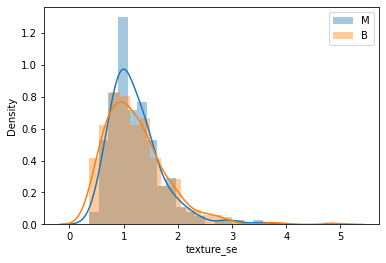

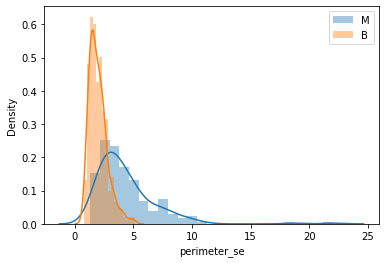

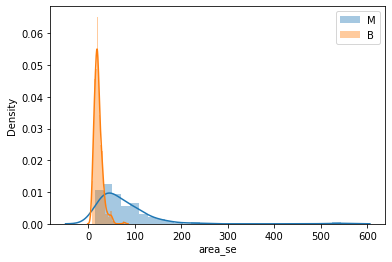

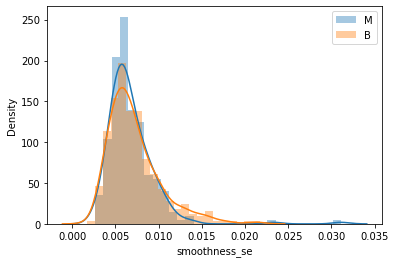

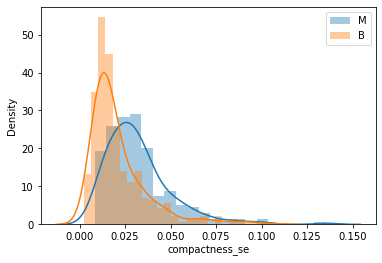

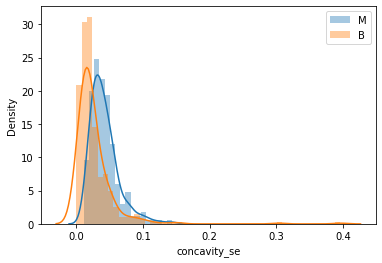

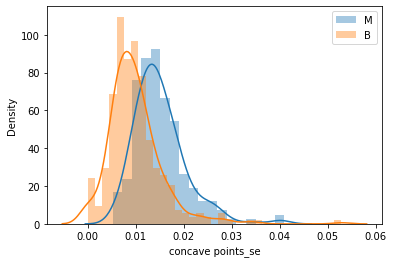

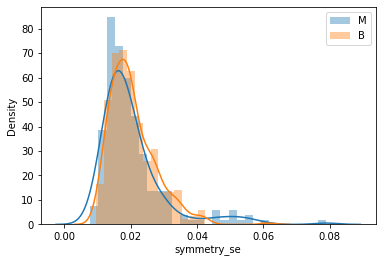

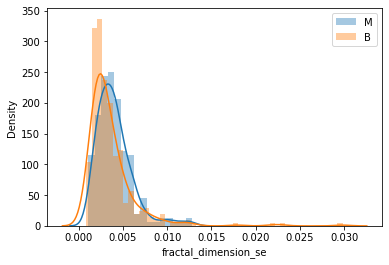

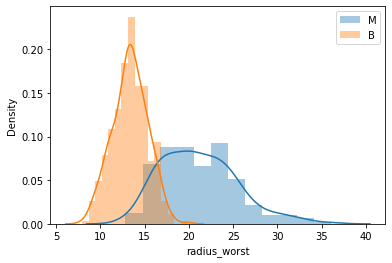

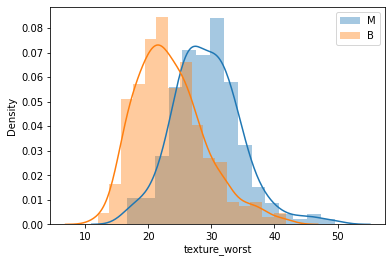

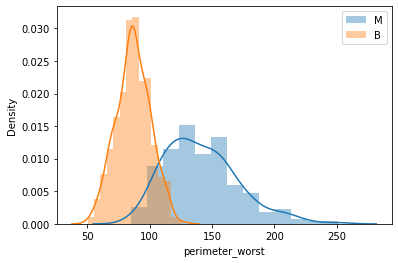

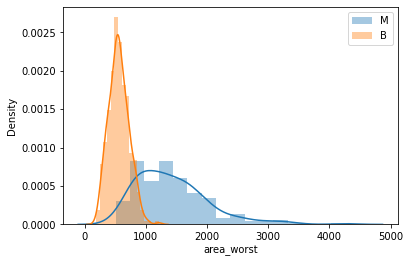

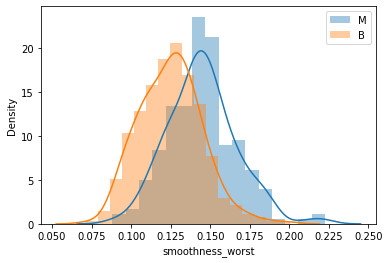

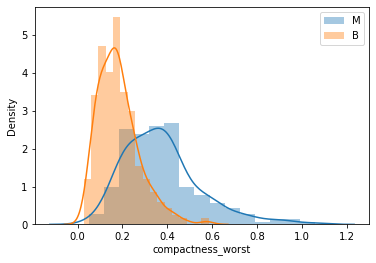

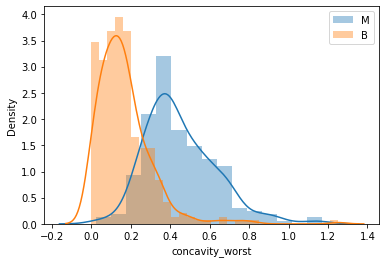

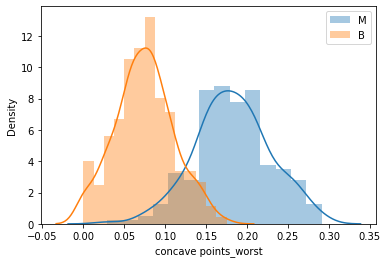

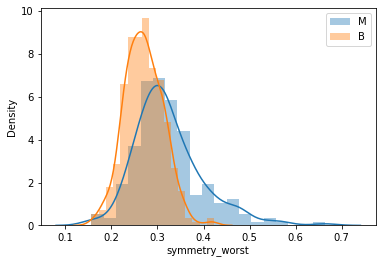

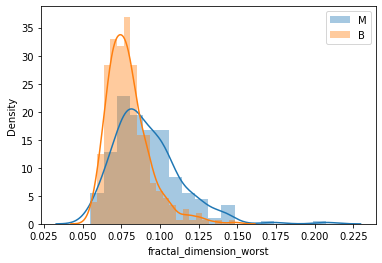

In [ ]:
#target/feature_df :
for col in features_df:
    plt.figure()
    sns.distplot(malin_df[col], label='M')
    sns.distplot(benin_df[col], label ='B')
    plt.legend()  

**Hypothèses alternatives :**

Pour chaque noyau cellulaire :

a) rayon :

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M est significativement supérieur à B. 



b) texture

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M est significativement supérieur à B. 

c) périmètre

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M est significativement supérieur à B. 

d) aire

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M est significativement supérieur à B. 

e) finesse

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M est significativement supérieur à B. 

f) épaisseur

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M est significativement supérieur à B. 
3.   pire/la plus grande : M est significativement supérieur à B. 

g)concavité

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B.
3.   pire/la plus grande : M est significativement supérieur à B. 

h) points concaves

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M est significativement supérieur à B. 

i) symétrie

1.   Moyenne : M est significativement supérieur à B. 
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M n'est pas significativement différent de B. 

j) dimension fractale

1.   Moyenne : M n'est pas significativement différent de B.  
2.   Erreur type : M n'est pas significativement différent de B. 
3.   pire/la plus grande : M n'est pas significativement différent de B.  


###b.variables/variables

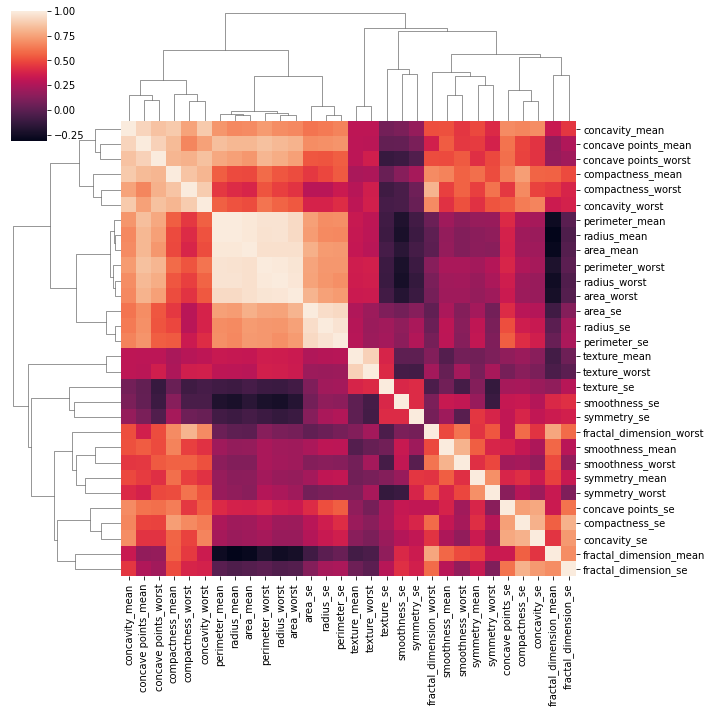

In [ ]:
sns.clustermap(df.drop(['diagnosis'], axis=1).corr())

**Observation :** 

Correlation entre les variables quantitatives suivantes :

Correlation 1 :
*   concavity_mean
*   concave points_mean
*   concave points_worst
*   compactness_mean
*   compactness_worst
*   concavity_worst

Correlation 2 :
*   perimeter_mean
*   radius_mean
*   area_mean
*   perimeter_worst
*   radius_worst
*   area_worst
*   area_se
*   radius_se
*   perimeter_se

Correlation 3 :
*   texture_worst
*   texture_mean

Correlation 4 :
*   concave points_se
*   compactness_se
*   concavity_se


#III.Test les hypothèses

Dans cette dernière partie, les différentes hypothèses vont être testées.

##1. Variables quantitatives (distribution normale) vs cible - test de student

H0 : les moyennes des variables X quantitatives sont significativement identiques chez les patients malins et benins.


In [ ]:
#import packages 
from scipy.stats import ttest_ind

In [ ]:
malin_df.shape

(212, 31)

In [ ]:
benin_df.shape

(357, 31)

In [ ]:
balanced_neg = benin_df.sample(malin_df.shape[0])

In [ ]:
#defined t-test
def t_test(col):
    alpha =0.01
    stat, p = ttest_ind(balanced_neg[col], benin_df[col])
    if p< alpha:
        return 'HO rejetée'
    else: 
        return 0

for col in features_df :
    print (f'{col :-<50} {t_test(col)}')

radius_mean--------------------------------------- 0
texture_mean-------------------------------------- 0
perimeter_mean------------------------------------ 0
area_mean----------------------------------------- 0
smoothness_mean----------------------------------- 0
compactness_mean---------------------------------- 0
concavity_mean------------------------------------ 0
concave points_mean------------------------------- 0
symmetry_mean------------------------------------- 0
fractal_dimension_mean---------------------------- 0
radius_se----------------------------------------- 0
texture_se---------------------------------------- 0
perimeter_se-------------------------------------- 0
area_se------------------------------------------- 0
smoothness_se------------------------------------- 0
compactness_se------------------------------------ 0
concavity_se-------------------------------------- 0
concave points_se--------------------------------- 0
symmetry_se-----------------------------------

**Conclusion** :  Il n'y a pas de différence significative entre les moyennes des différentes variables des patients malins et benins (test de student, p-value = 0.01).


#CONCLUSION

Lorsqu'on regarde la dépendance entre les variables quantitatives et la cible, nous pouvons conclure qu'il n'y a **pas de différence significative** entre les moyennes des différentes variables quantitatives des patients atteints et non atteints de cardiopathie(test de student, p-value = 0.01).

Cependant lorsqu'on regarde la dépendance entre les variables qualitatives et la cible, nous pouvons conclure qu'elles sont **dépendantes** (Chi 2, p-value = 0.01).

Enfin lorsqu'on regarde la dépendance au sein des variables qualitatives, nous pouvons observer une **dépendance** (Chi 2, p-value = 0.01). Cela nous permet de formuler les observations suivantes :

1.   Les hommes sont plus asymptomatiques et succeptible de déclancher une angine lors de l'effort.
2.   Les patients asymptomatiques sont plus succeptible de développer une angine durant l'exercice et de présenter une pente du segment ST d'effort maximal plate.
3.   Les patients développant une angine durant l'exercice sont plus succeptible de présenter une pente du segment ST d'effort maximal plate.